
## INE Instituto nacional de estadística

In [1]:
%load_ext autoreload
%autoreload 2
import json
import os
import re
import sys
from datetime import date
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import requests

cwd = Path.cwd()
home = Path.home()
module_path = f"{home}/serhi/src/lib" if cwd == home else f"{cwd.parents[1]}/lib"
sys.path.append(module_path)
import serhi

SerHi Tools


In [2]:
# inicio
# cambiar como corresponda
ENTITY = "ine"
NB_NAME = "ine_ipri"
serhi.initialize(ENTITY, NB_NAME)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/ine
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/ine/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/ine/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/ine/ine_ipri.csv


serhi.CWD /home/node
serhi.BASE_PATH ../../..
serhi.DATA_PATH ../../../data/process/ine/
serhi.DOWN_PATH ../../../tmp/download/ine/
serhi.OUT_FILE ../../../data/process/ine/ine_ipri.csv


PermissionError: [Errno 13] Permission denied: '../../../data'

In [3]:
print(dir(serhi))

['BASE_PATH', 'CWD', 'DATA_PATH', 'DOWN_PATH', 'HOME', 'OUT_FILE', 'Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'download_files', 'initialize', 'os', 'requests']


In [4]:
def download_files(urls):
    for loc in urls:
        url = loc["url"]
        r = requests.get(url, allow_redirects=True)
        print(f"Downloading {url}")
        open(serhi.DOWN_PATH + loc["file"], "wb").write(r.content)


urls = [
    # ipri
    {
        "url": "https://www.ine.es/jaxiT3/files/t/es/xlsx/27065.xlsx?nocab=1",
        "file": "ine_ipri.xlsx",
    },
]

download_files(urls)

In [5]:
# IPRI
loc = urls[0]
file = loc["file"]
df = pd.read_excel(serhi.DOWN_PATH + file, skiprows=6, nrows=162, header=(0, 1))
df.head()

/opt/hostedtoolcache/Python/3.9.14/x64/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Índice                             \
                                          2022M08  2022M07  2022M06  2022M05   
0                               Nacional      NaN      NaN      NaN      NaN   
1                        Total industria  165.647  161.144  161.043  158.077   
2                      Bienes de consumo  119.930  118.915  117.907  117.539   
3             Bienes de consumo duradero  116.442  116.213  116.032  115.328   
4          Bienes de consumo no duradero  120.138  119.080  118.025  117.677   

                                                ...  \
   2022M04  2022M03  2022M02  2022M01  2021M12  ...   
0      NaN      NaN      NaN      NaN      NaN  ...   
1  156.597  154.613  144.926  141.878  136.311  ...   
2  116.775  114.526  111.483  110.575  108.875  ...   
3  114.533  114.112  113.252  111.651  109.821  ...   
4  116.914  114.564  111.400  110.531  108.837  ...   

  Variación en lo que va de año                                          \
                        1975M10 1975M09 1975M08 1975M07 1975M06 1975M05   
0                           NaN     NaN     NaN     NaN     NaN     NaN   
1                                                                         
2                                                                         
3                                                                         
4                                                                         

                                   
  1975M04 1975M03 1975M02 1975M01  
0     NaN     NaN     NaN     NaN  
1                                  
2                                  
3                                  
4                                  

[5 rows x 2289 columns]

In [6]:
df.tail()

Índice                    \
                                            2022M08  2022M07  2022M06   
157          Bienes de consumo no duradero  114.347  113.749  112.304   
158                       Bienes de equipo  101.620  101.761  101.366   
159                     Bienes intermedios  130.501  128.232  125.814   
160                                Energía  286.562  240.332  226.789   
161            Total industria sin energía  118.441  117.379  115.743   

                                                           ...  \
     2022M05  2022M04  2022M03  2022M02  2022M01  2021M12  ...   
157  111.898  110.947  109.301  108.769  108.696  106.705  ...   
158  101.293  101.186  100.936  100.805  100.791  100.704  ...   
159  125.641  126.292  125.660  122.317  122.134  114.419  ...   
160  223.572  225.928  223.744  206.389  202.140  173.825  ...   
161  115.448  115.078  113.902  112.513  112.408  108.727  ...   

    Variación en lo que va de año                                          \
                          1975M10 1975M09 1975M08 1975M07 1975M06 1975M05   
157                                                                         
158                                                                         
159                                                                         
160                                                                         
161                                                                         

                                     
    1975M04 1975M03 1975M02 1975M01  
157                                  
158                                  
159                                  
160                                  
161                                  

[5 rows x 2289 columns]

In [7]:
df.columns.levels[0]

Index([' ', 'Variación anual', 'Variación en lo que va de año',
       'Variación mensual', 'Índice'],
      dtype='object')

In [8]:
df = df.rename(columns={" ": "Name"})

In [9]:
# da = df.xs('Índice', axis=1, level=0, drop_level=True)

In [10]:
df = df[['Name', 'Índice']]

In [11]:
df

Name   Índice                    \
                                      Name  2022M08  2022M07  2022M06   
0                                 Nacional      NaN      NaN      NaN   
1                          Total industria  165.647  161.144  161.043   
2                        Bienes de consumo  119.930  118.915  117.907   
3               Bienes de consumo duradero  116.442  116.213  116.032   
4            Bienes de consumo no duradero  120.138  119.080  118.025   
..                                     ...      ...      ...      ...   
157          Bienes de consumo no duradero  114.347  113.749  112.304   
158                       Bienes de equipo  101.620  101.761  101.366   
159                     Bienes intermedios  130.501  128.232  125.814   
160                                Energía  286.562  240.332  226.789   
161            Total industria sin energía  118.441  117.379  115.743   

                                                           ...          \
     2022M05  2022M04  2022M03  2022M02  2022M01  2021M12  ... 1975M10   
0        NaN      NaN      NaN      NaN      NaN      NaN  ...     NaN   
1    158.077  156.597  154.613  144.926  141.878  136.311  ...  13.287   
2    117.539  116.775  114.526  111.483  110.575  108.875  ...  13.519   
3    115.328  114.533  114.112  113.252  111.651  109.821  ...    15.1   
4    117.677  116.914  114.564  111.400  110.531  108.837  ...   13.29   
..       ...      ...      ...      ...      ...      ...  ...     ...   
157  111.898  110.947  109.301  108.769  108.696  106.705  ...           
158  101.293  101.186  100.936  100.805  100.791  100.704  ...           
159  125.641  126.292  125.660  122.317  122.134  114.419  ...           
160  223.572  225.928  223.744  206.389  202.140  173.825  ...           
161  115.448  115.078  113.902  112.513  112.408  108.727  ...           

                                                                             
    1975M09 1975M08 1975M07 1975M06 1975M05 1975M04 1975M03 1975M02 1975M01  
0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1    13.208  13.128  13.128  13.049  13.049  12.889  12.889   12.81  12.571  
2    13.519  13.435  13.351  13.351  13.267  13.099  13.015  12.931  12.847  
3    15.013  15.013  14.926  14.926  14.838  14.664  14.489  14.489  14.489  
4    13.207  13.207  13.123  13.039  13.039  12.872  12.705  12.705  12.538  
..      ...     ...     ...     ...     ...     ...     ...     ...     ...  
157                                                                          
158                                                                          
159                                                                          
160                                                                          
161                                                                          

[162 rows x 573 columns]

In [12]:
df.columns = df.columns.droplevel()
df

,Name,2022M08,2022M07,2022M06,2022M05,2022M04,2022M03,2022M02,2022M01,2021M12,...,1975M10,1975M09,1975M08,1975M07,1975M06,1975M05,1975M04,1975M03,1975M02,1975M01
0,Nacional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total industria,165.647,161.144,161.043,158.077,156.597,154.613,144.926,141.878,136.311,...,13.287,13.208,13.128,13.128,13.049,13.049,12.889,12.889,12.81,12.571
2,Bienes de consumo,119.930,118.915,117.907,117.539,116.775,114.526,111.483,110.575,108.875,...,13.519,13.519,13.435,13.351,13.351,13.267,13.099,13.015,12.931,12.847
3,Bienes de consumo duradero,116.442,116.213,116.032,115.328,114.533,114.112,113.252,111.651,109.821,...,15.1,15.013,15.013,14.926,14.926,14.838,14.664,14.489,14.489,14.489
4,Bienes de consumo no duradero,120.138,119.080,118.025,117.677,116.914,114.564,111.400,110.531,108.837,...,13.29,13.207,13.207,13.123,13.039,13.039,12.872,12.705,12.705,12.538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Bienes de consumo no duradero,114.347,113.749,112.304,111.898,110.947,109.301,108.769,108.696,106.705,...,,,,,,,,,,
158,Bienes de equipo,101.620,101.761,101.366,101.293,101.186,100.936,100.805,100.791,100.704,...,,,,,,,,,,
159,Bienes intermedios,130.501,128.232,125.814,125.641,126.292,125.660,122.317,122.134,114.419,...,,,,,,,,,,
160,Energía,286.562,240.332,226.789,223.572,225.928,223.744,206.389,202.140,173.825,...,,,,,,,,,,


In [13]:
def ine_sheet_ccaa(df, set_name, nccaa=18, ndatos=9, ud="idx"):
    dr = pd.DataFrame()
    for i in range(0, nccaa):
        # get next rows
        dt = df.loc[i * ndatos : i * ndatos + (ndatos - 1)]
        dt.reset_index(inplace=True, drop=True)
        # save zone
        zone = dt.loc[0][0]
        # delete first row
        dt = dt.loc[1:]
        # change columns names - to months
        columns = [w.replace("M", "-") for w in dt.columns]
        columns = [re.sub(r"\.[0-9]", "", w) for w in columns]
        columns = [w + "-01" for w in columns]
        columns[0] = "Name"
        dt.columns = columns
        dt = dt.T
        # promote columns
        dt.columns = dt.iloc[0]
        dt = dt[1:]
        dt.columns = [w.strip() for w in dt.columns]
        # change index name
        dt.index.rename("Date", inplace=True)
        # sort and scale
        dt.sort_index(ascending=True, inplace=True)
        # transpose
        dt = dt.unstack()
        dt = dt.reset_index()
        # set zone
        dt["Zone"] = zone
        dt["Ud"] = ud
        # set column value
        dt = dt.rename(columns={0: "Value"})
        # concat
        dr = pd.concat([dr, dt])

    dr["Set"] = set_name
    dr.rename(columns={"level_0": "Name"}, inplace=True)
    return dr

In [14]:
df = ine_sheet_ccaa(df, set_name="INE_IPRI")
df.head()

,Name,Date,Value,Zone,Ud,Set
0,Total industria,1975-01-01,12.571,Nacional,idx,INE_IPRI
1,Total industria,1975-02-01,12.81,Nacional,idx,INE_IPRI
2,Total industria,1975-03-01,12.889,Nacional,idx,INE_IPRI
3,Total industria,1975-04-01,12.889,Nacional,idx,INE_IPRI
4,Total industria,1975-05-01,13.049,Nacional,idx,INE_IPRI


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82368 entries, 0 to 4575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    82368 non-null  object
 1   Date    82368 non-null  object
 2   Value   82368 non-null  object
 3   Zone    82368 non-null  object
 4   Ud      82368 non-null  object
 5   Set     82368 non-null  object
dtypes: object(6)
memory usage: 4.4+ MB


In [16]:
df["Name"].unique()

array(['Total industria', 'Bienes de consumo',
       'Bienes de consumo duradero', 'Bienes de consumo no duradero',
       'Bienes de equipo', 'Bienes intermedios', 'Energía',
       'Total industria sin energía'], dtype=object)

In [17]:
df["Zone"].unique()

array(['Nacional', '01 Andalucía', '02 Aragón',
       '03 Asturias, Principado de', '04 Balears, Illes', '05 Canarias',
       '06 Cantabria', '07 Castilla y León', '08 Castilla - La Mancha',
       '09 Cataluña', '10 Comunitat Valenciana', '11 Extremadura',
       '12 Galicia', '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La'],
      dtype=object)

In [18]:
df

,Name,Date,Value,Zone,Ud,Set
0,Total industria,1975-01-01,12.571,Nacional,idx,INE_IPRI
1,Total industria,1975-02-01,12.81,Nacional,idx,INE_IPRI
2,Total industria,1975-03-01,12.889,Nacional,idx,INE_IPRI
3,Total industria,1975-04-01,12.889,Nacional,idx,INE_IPRI
4,Total industria,1975-05-01,13.049,Nacional,idx,INE_IPRI
...,...,...,...,...,...,...
4571,Total industria sin energía,2022-04-01,115.078,"17 Rioja, La",idx,INE_IPRI
4572,Total industria sin energía,2022-05-01,115.448,"17 Rioja, La",idx,INE_IPRI
4573,Total industria sin energía,2022-06-01,115.743,"17 Rioja, La",idx,INE_IPRI
4574,Total industria sin energía,2022-07-01,117.379,"17 Rioja, La",idx,INE_IPRI


In [19]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].agg(["min", "max"])

min   1975-01-01
max   2022-08-01
Name: Date, dtype: datetime64[ns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82368 entries, 0 to 4575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    82368 non-null  object        
 1   Date    82368 non-null  datetime64[ns]
 2   Value   82368 non-null  object        
 3   Zone    82368 non-null  object        
 4   Ud      82368 non-null  object        
 5   Set     82368 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.4+ MB


In [21]:
# fill na with 0
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
df["Value"] = df["Value"].fillna(0)

Nacional


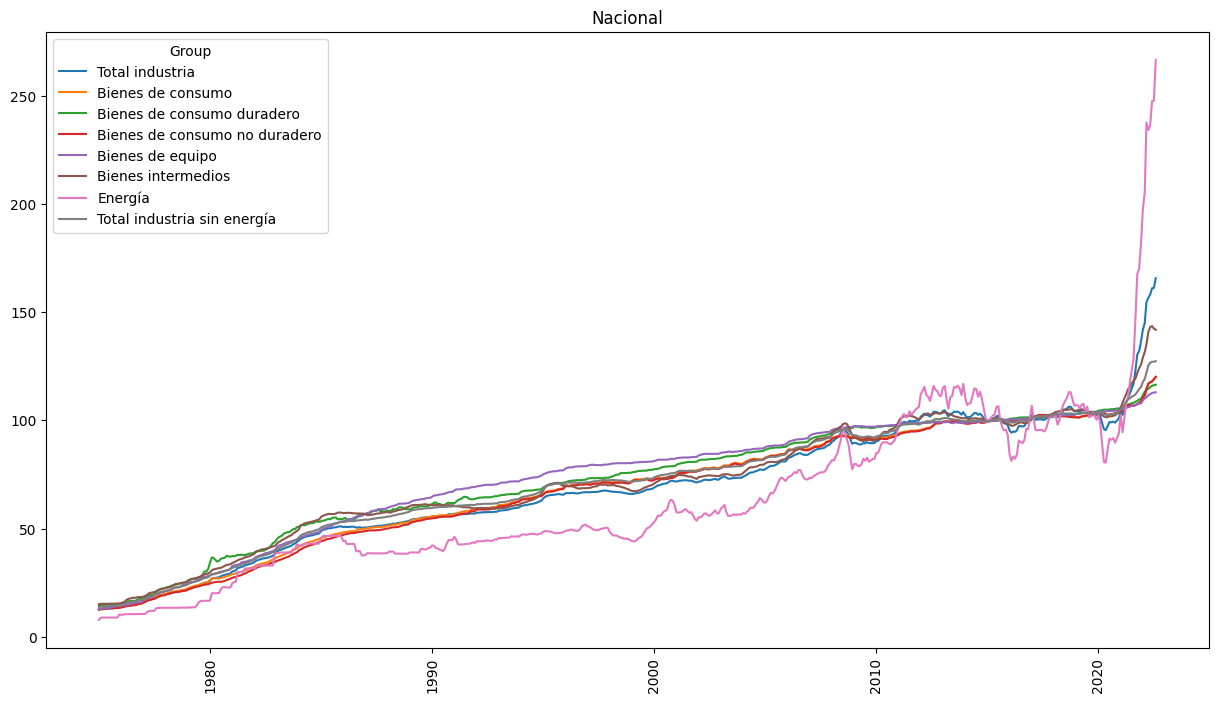

01 Andalucía


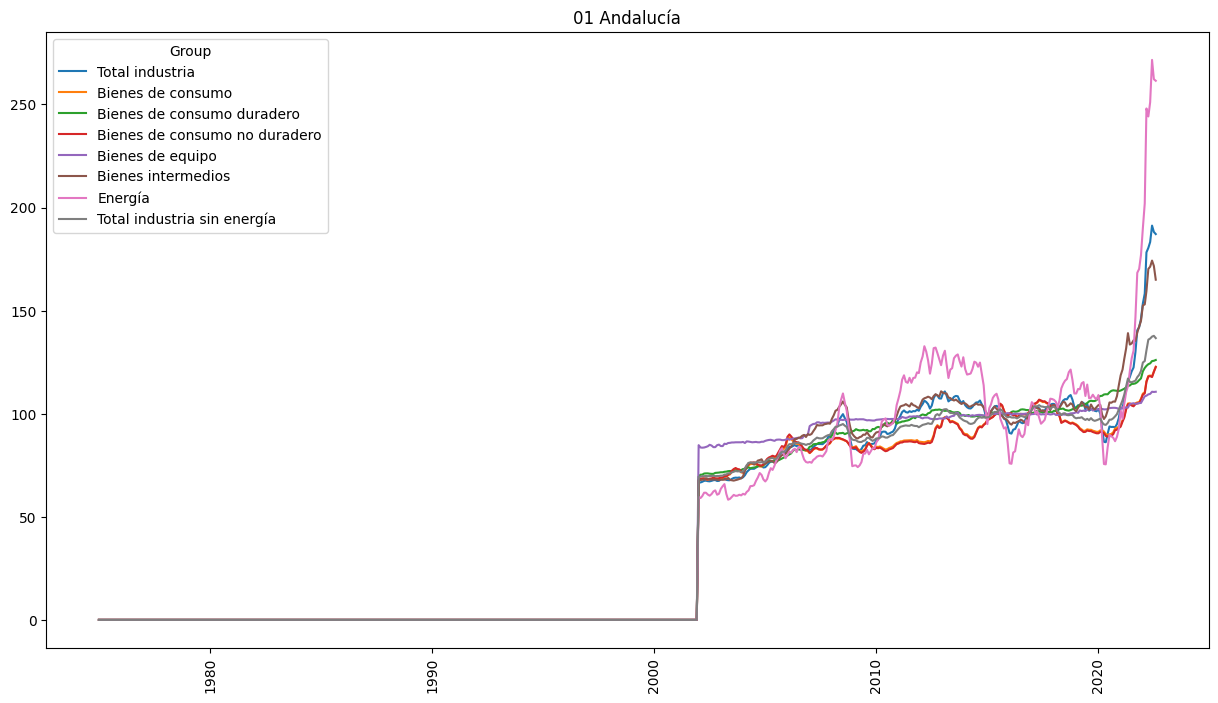

02 Aragón


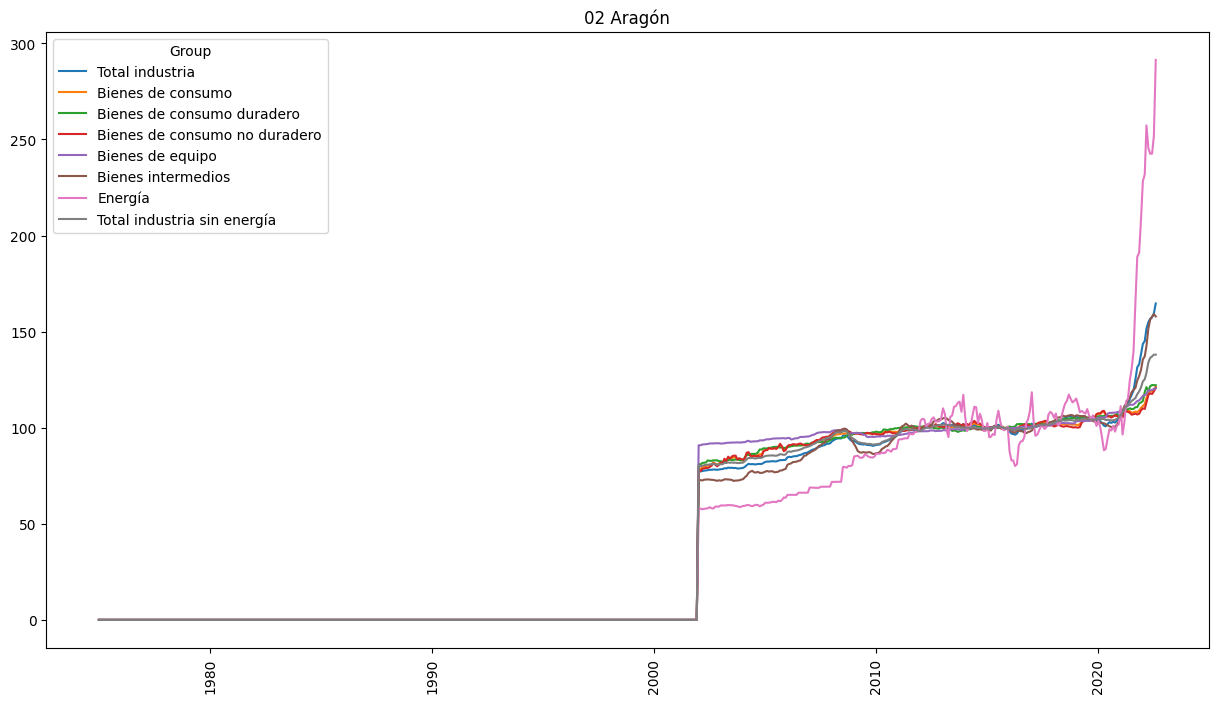

03 Asturias, Principado de


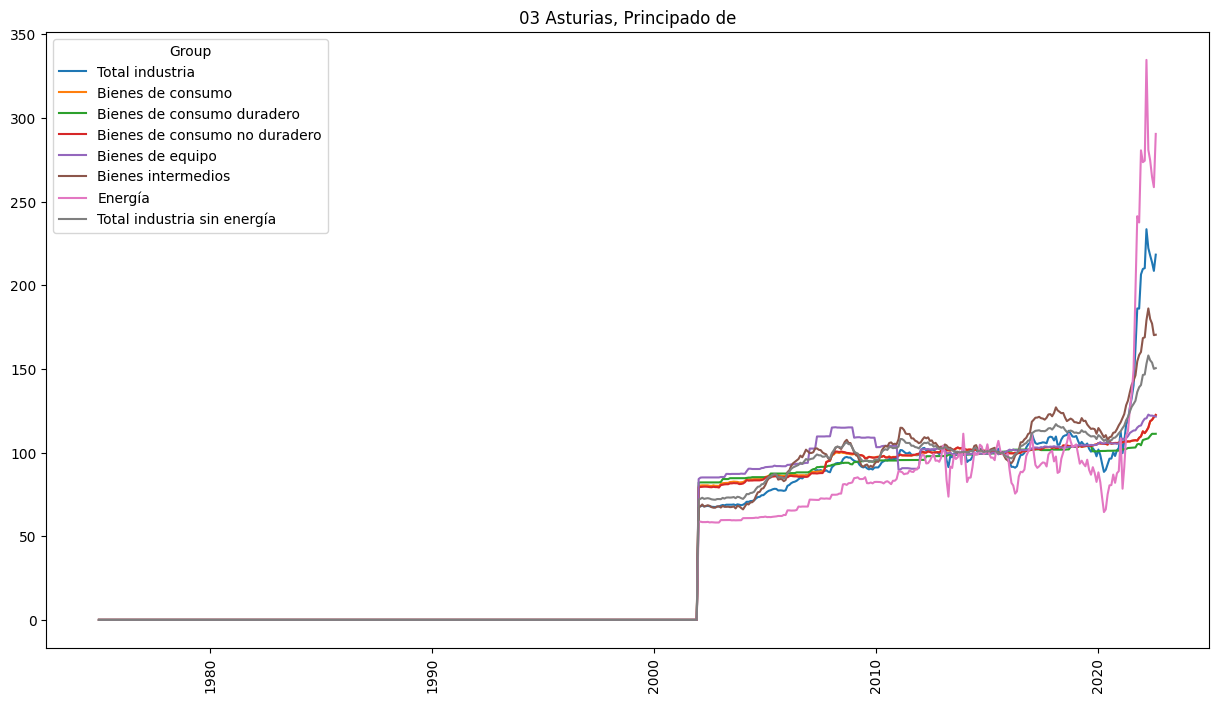

04 Balears, Illes


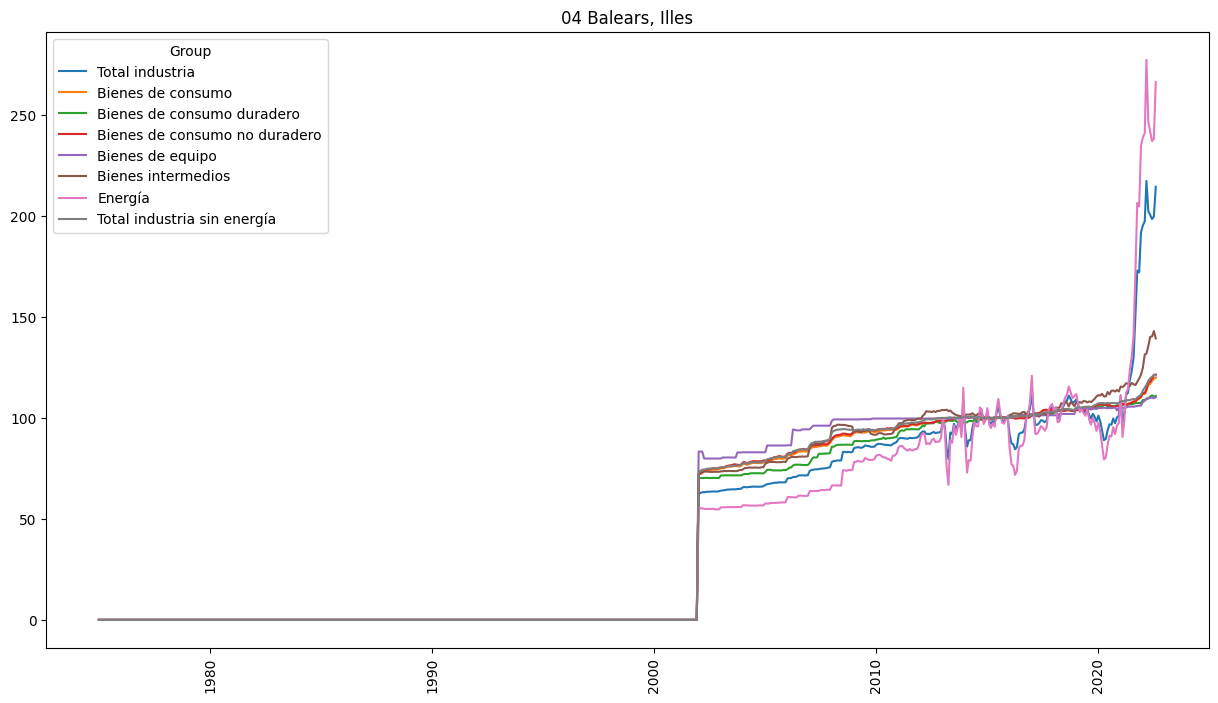

05 Canarias


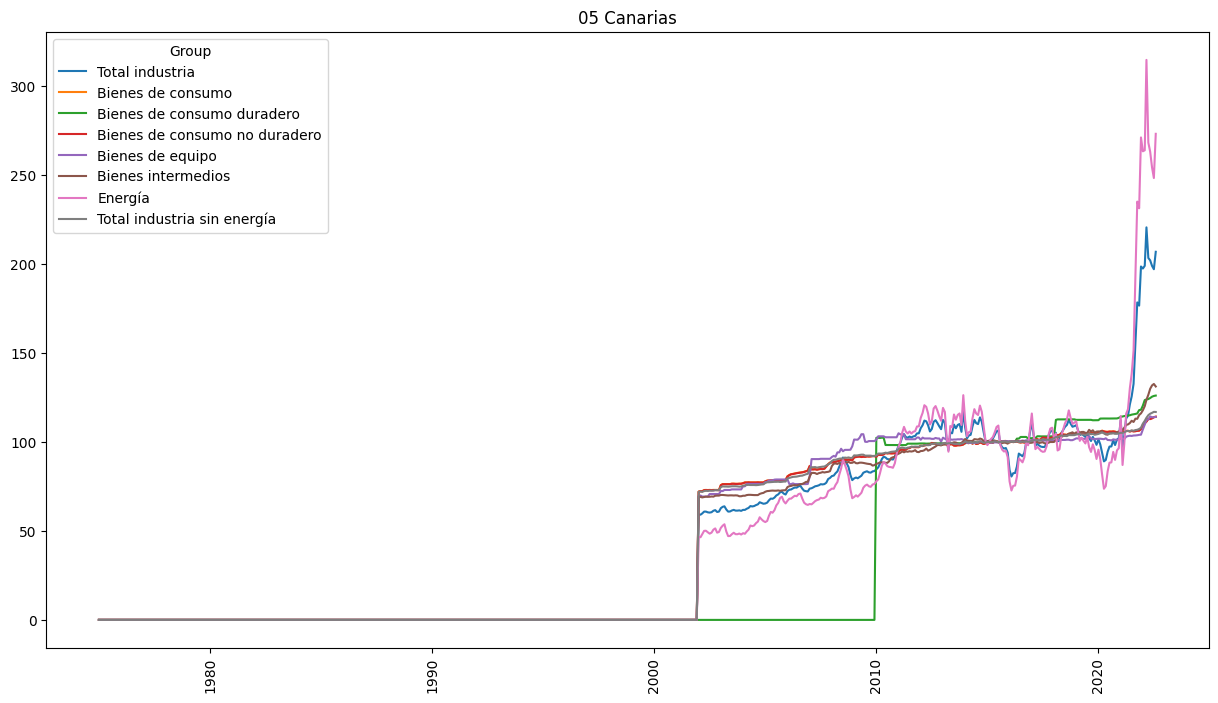

06 Cantabria


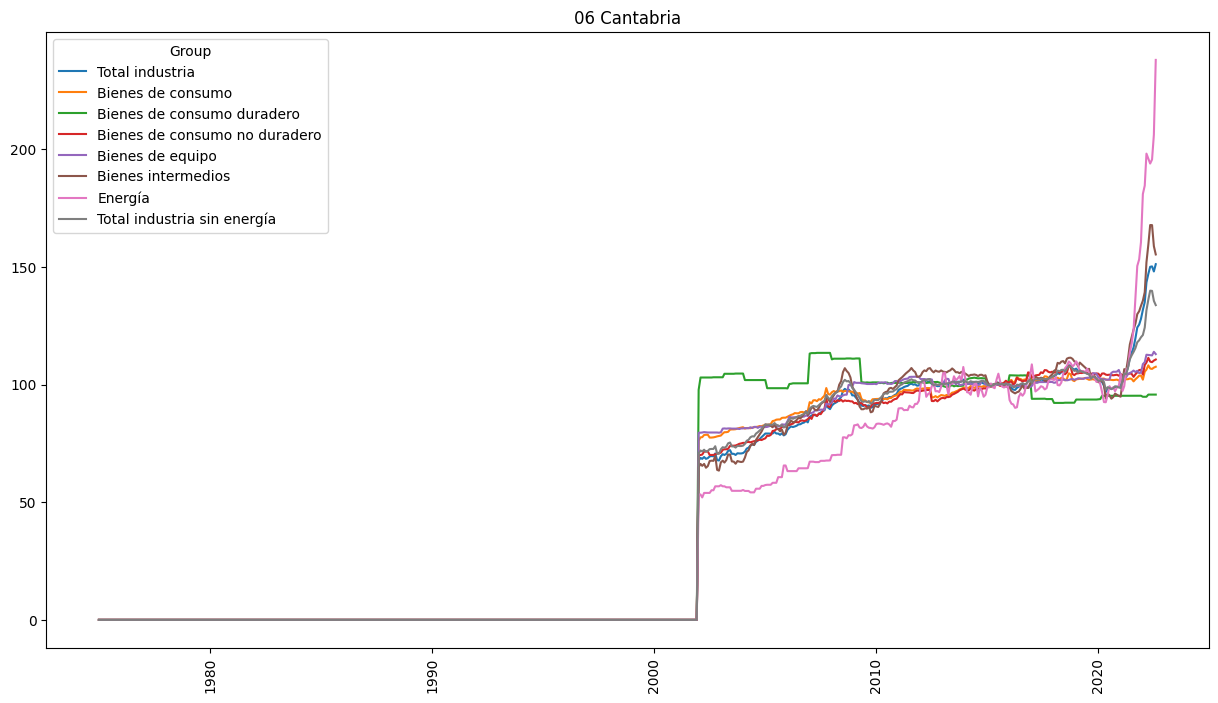

07 Castilla y León


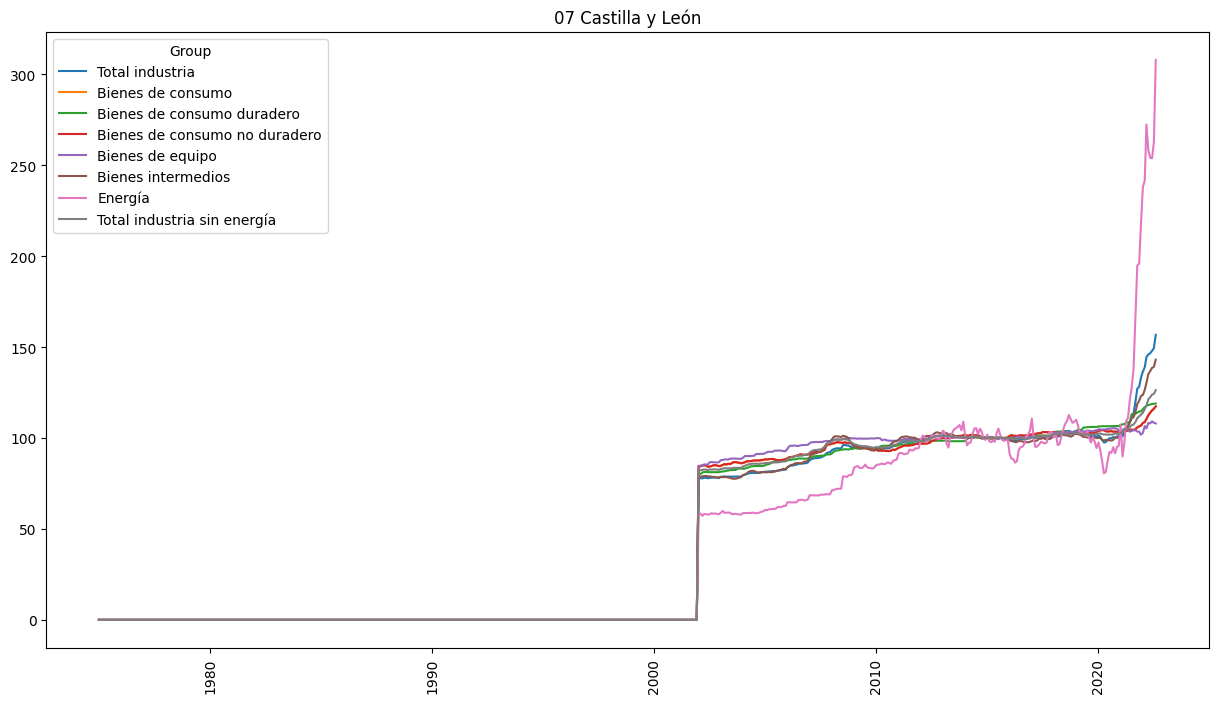

08 Castilla - La Mancha


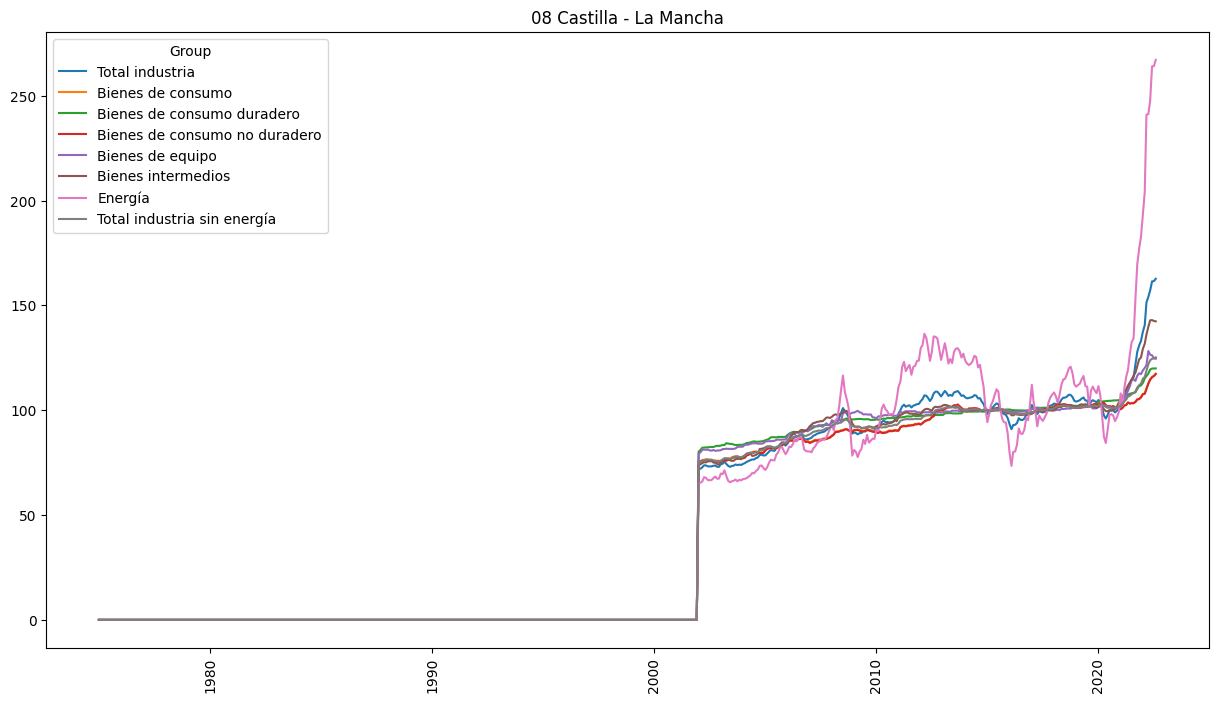

09 Cataluña


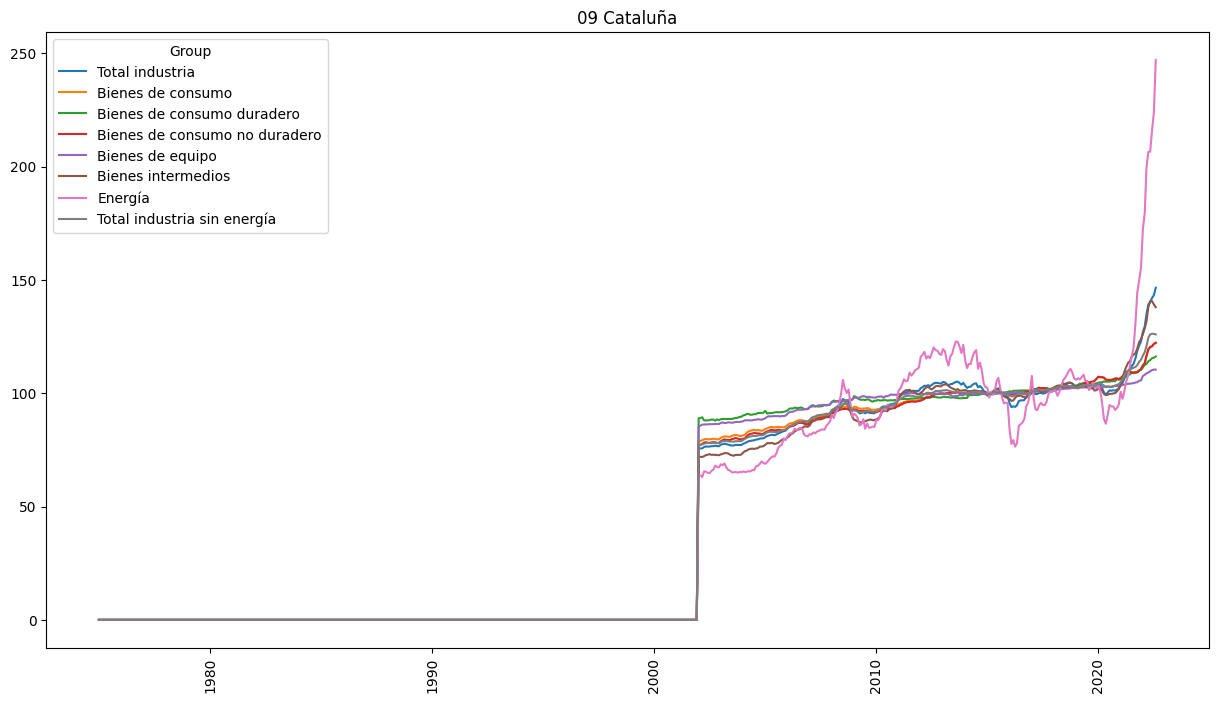

10 Comunitat Valenciana


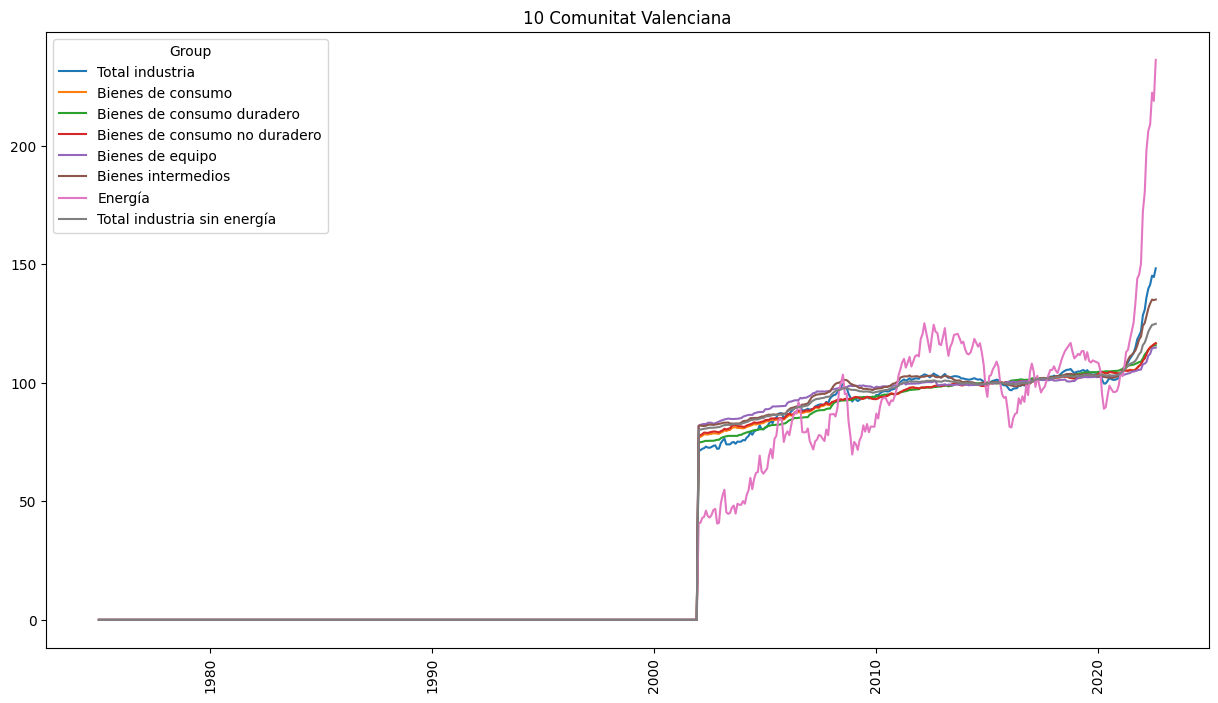

11 Extremadura


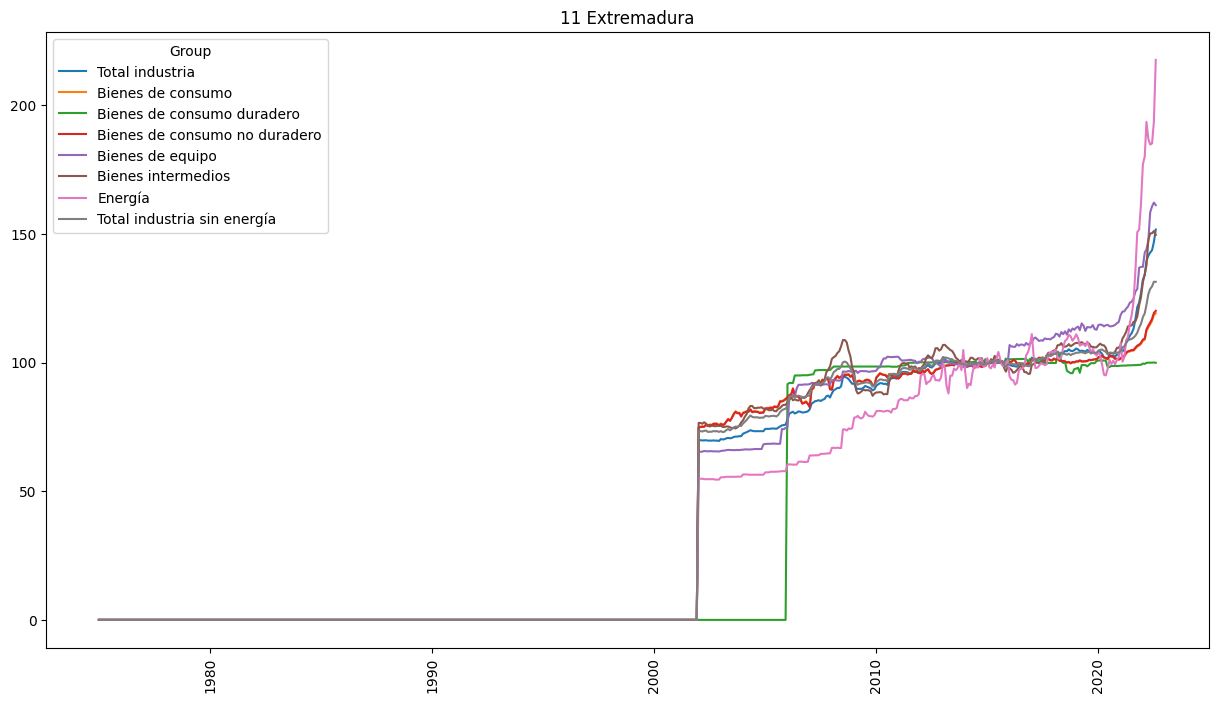

12 Galicia


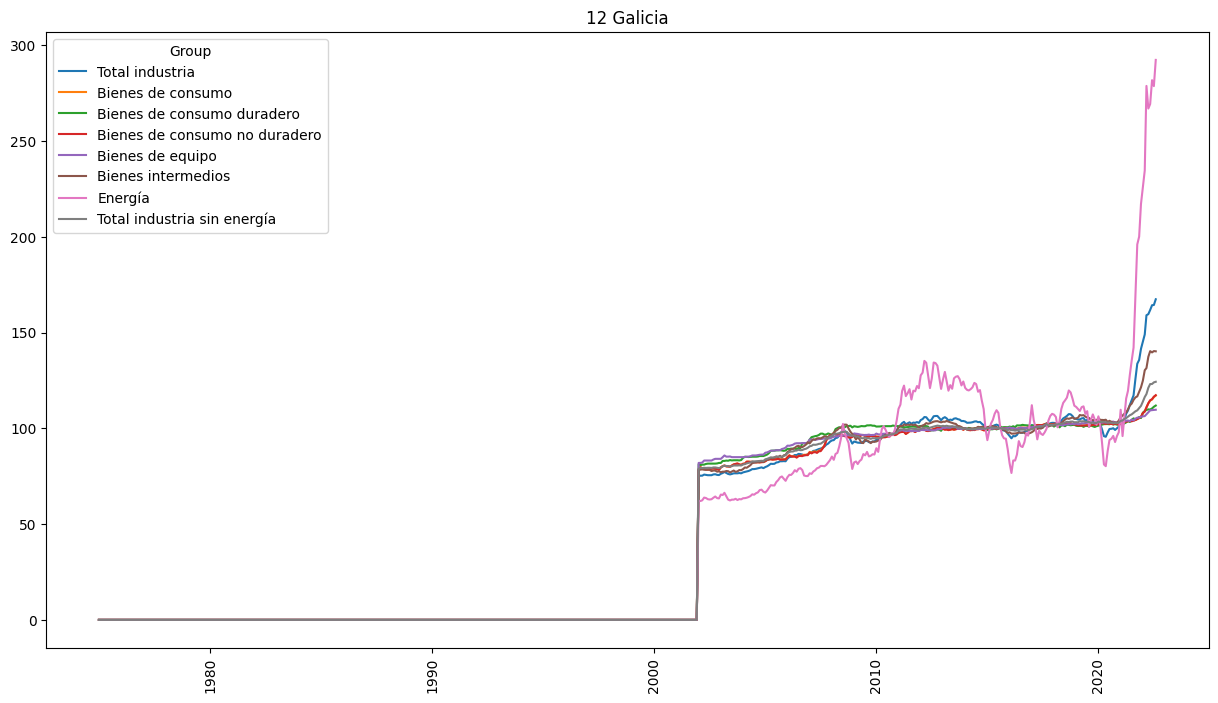

13 Madrid, Comunidad de


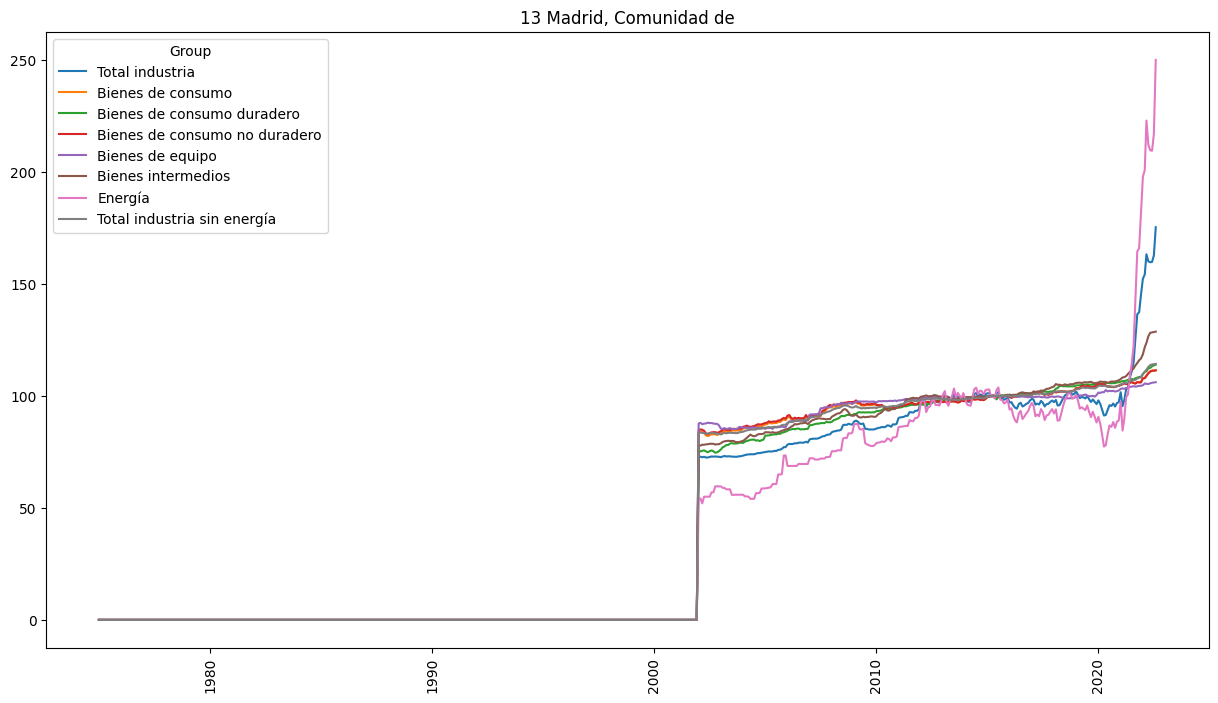

14 Murcia, Región de


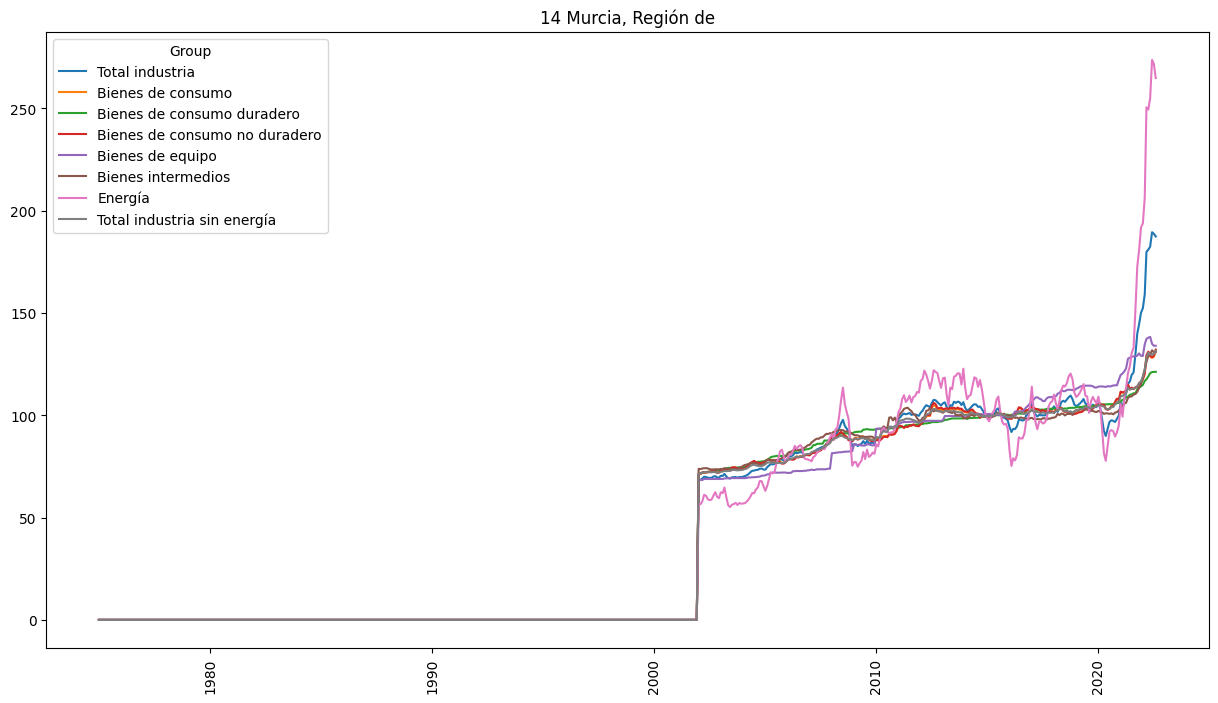

15 Navarra, Comunidad Foral de


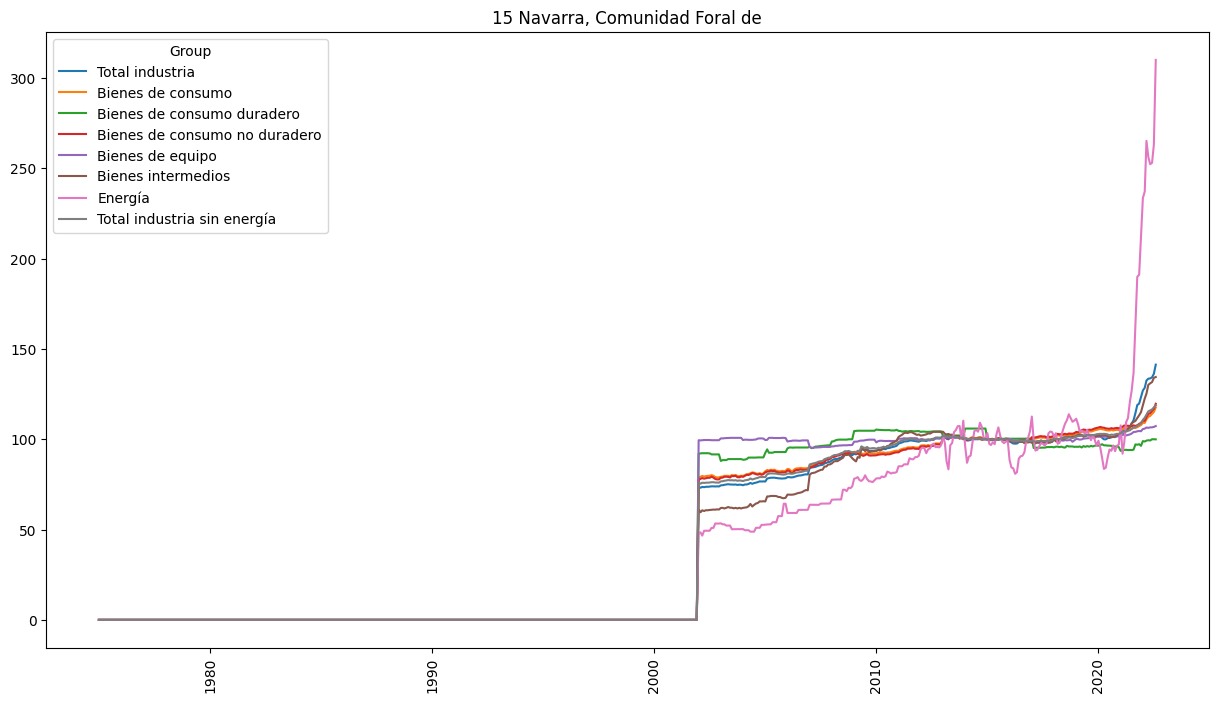

16 País Vasco


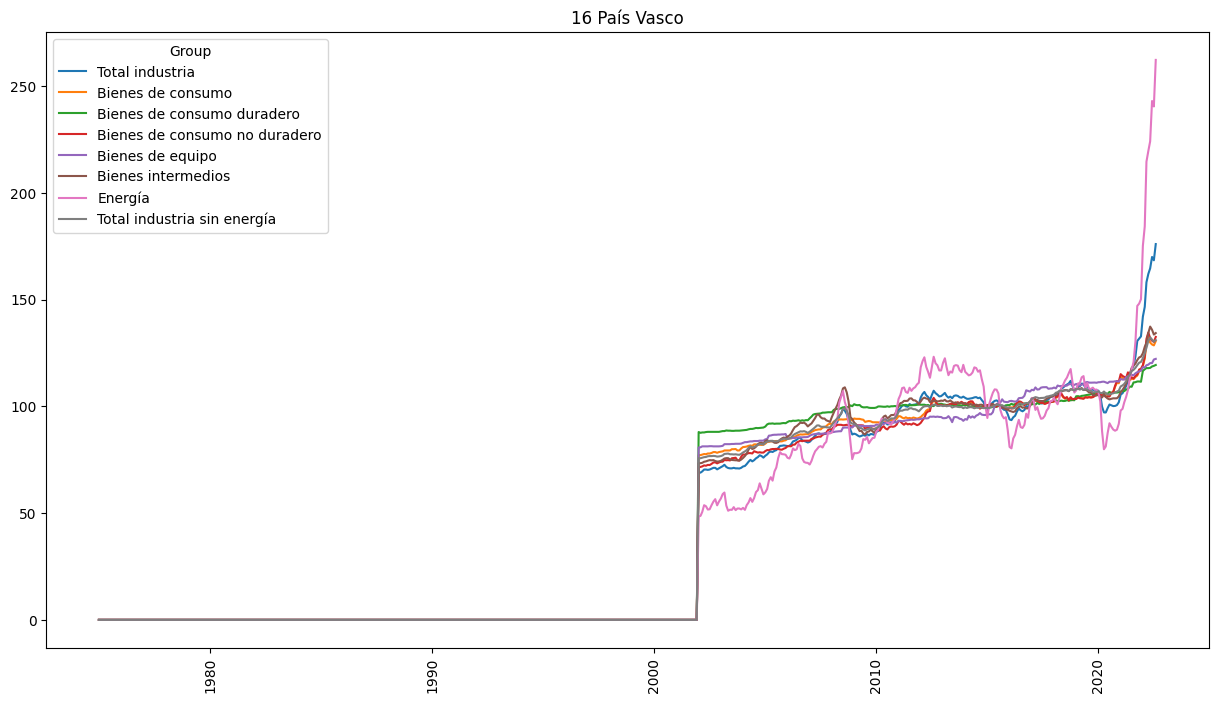

17 Rioja, La


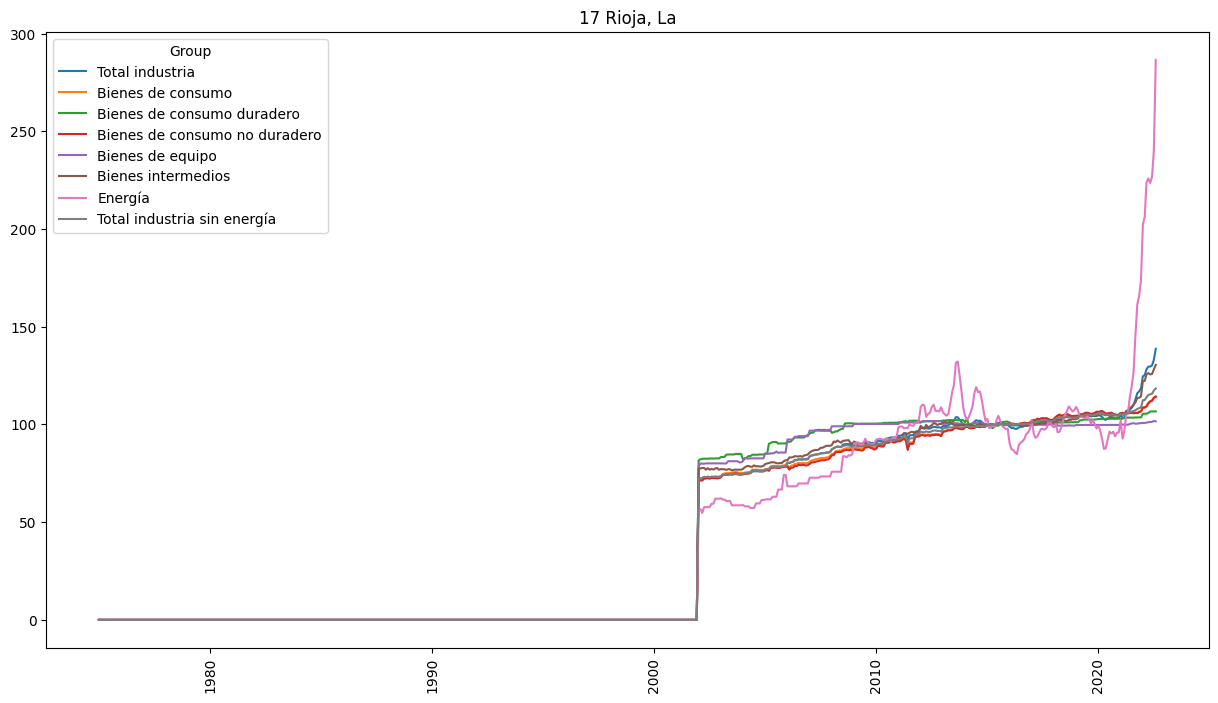

In [22]:
names = df["Name"].unique()
zones = df["Zone"].unique()

for z in zones:
    fig, ax = plt.subplots(figsize=(15, 8))
    print(z)
    dx = df[df["Zone"] == z]
    plt.title(z)
    for n in names:
        dxz = dx[dx["Name"] == n]
        plt.plot(dxz["Date"], dxz["Value"], label=f"{n}")
    plt.legend(title="Group")
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
# Guardamos la serie procesada
df.to_csv(serhi.OUT_FILE, index=False)